# 1D Signal Processing: peak detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### detect peaks from a clean signal

In [2]:
f = 10 # Frequency, in cycles per second, or Hertz
fs = 1000 # Sampling rate, the number of data points per second
Ts=1/fs
Duration = 1 #signal duration
N = Duration * fs # total number of data points
t = np.linspace(0, Duration-Ts, N) # an array of timepoints
pi=np.pi
x = np.sin(2*pi*f*t) # the signal is sampled from a sine function

In [3]:
t.shape

(1000,)

In [4]:
x.shape

(1000,)

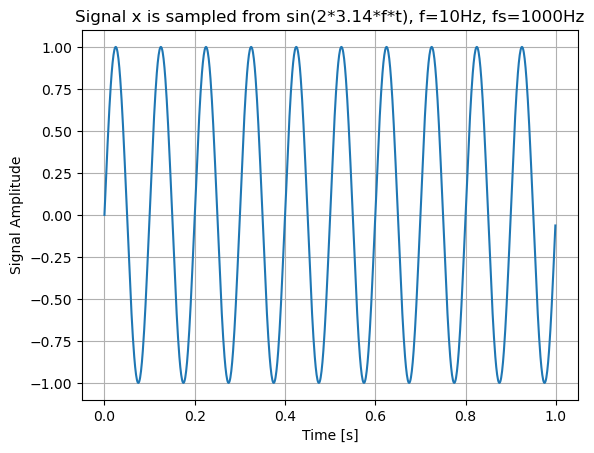

In [5]:
fig, ax = plt.subplots()
ax.plot(t, x, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('Signal x is sampled from sin(2*3.14*f*t), f=10Hz, fs=1000Hz')
ax.grid(True)

In [6]:
import scipy
from scipy.ndimage import correlate
def peak_detector(x):
    #two kernels
    h1 = [-1, 1, 0]
    h2 = [0, 1, -1]
    y = correlate(x, h1, mode='nearest')
    z = correlate(x, h2, mode='nearest')
    #find the indexes of the positive elements in y
    IndexArray1= np.where(y>0) 
    #find the indexes of the positive elements in z
    IndexArray2= np.where(z>0) 
    # find the intersection of IndexArray1 and IndexArray2
    PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2) 
    # a better way to get PeakIndexArray
    #PeakIndexArray = np.where((y>0)&(z>0))[0]
    return PeakIndexArray

In [7]:
PeakIndexArray=peak_detector(x)

In [8]:
PeakIndexArray.shape

(10,)

In [9]:
t[PeakIndexArray] # timeponts of the peaks

array([0.025, 0.125, 0.225, 0.325, 0.425, 0.525, 0.625, 0.725, 0.825,
       0.925])

In [10]:
x[PeakIndexArray] # signal amplitdue values of the peaks

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

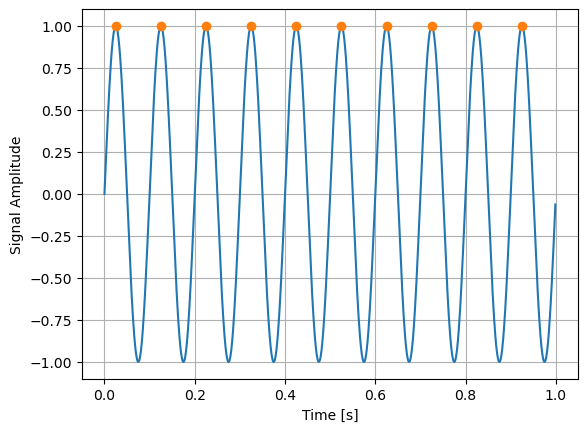

In [11]:
fig, ax = plt.subplots()
ax.plot(t, x, '-') # '-' to connect points with lines
ax.plot(t[PeakIndexArray], x[PeakIndexArray], 'o') # 'o' to plot dots only
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.grid(True)

### detect peaks from a noisy signal

Usually, a signal contains noises <br>
Now, let's add some random noise to the signal x <br>
then find the peaks of the noisy signal x_noisy

In [12]:
 # add some noise to the clean signal x
x_noisy = x + np.random.rand(x.shape[0])

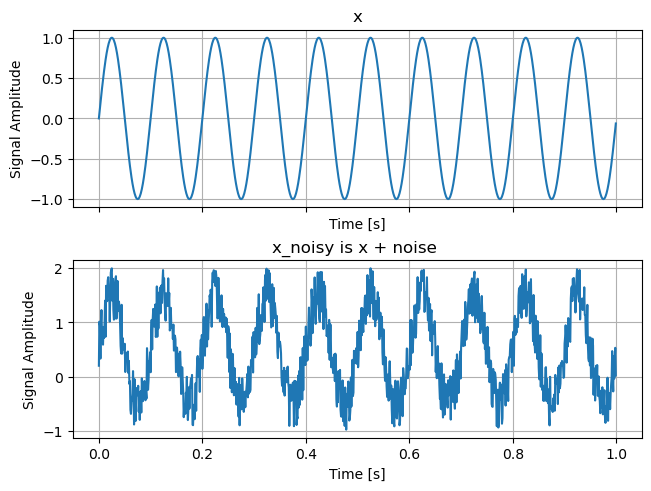

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('x')
ax[0].grid(True)
ax[1].plot(t, x_noisy, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('x_noisy is x + noise ')
ax[1].grid(True)

In [14]:
peak_idx_array=peak_detector(x_noisy)

In [15]:
peak_idx_array.shape

(327,)

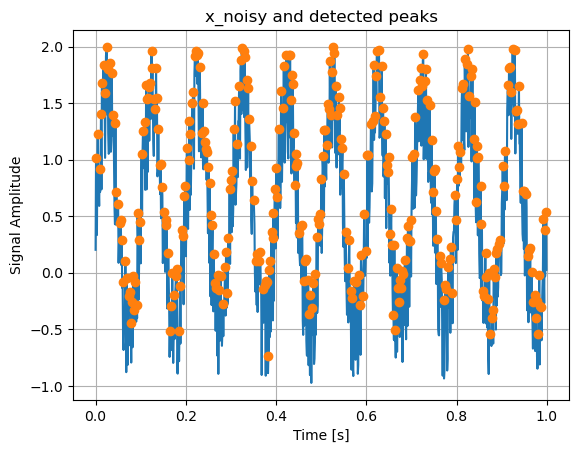

In [16]:
fig, ax = plt.subplots()
ax.plot(t, x_noisy, '-')
ax.plot(t[peak_idx_array], x_noisy[peak_idx_array], 'o')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('x_noisy and detected peaks')
ax.grid(True)

#### too many peaks from the noisy signal

#### Let's 'remove' noise from the noisy signal by smoothing

(-0.05, 0.05)

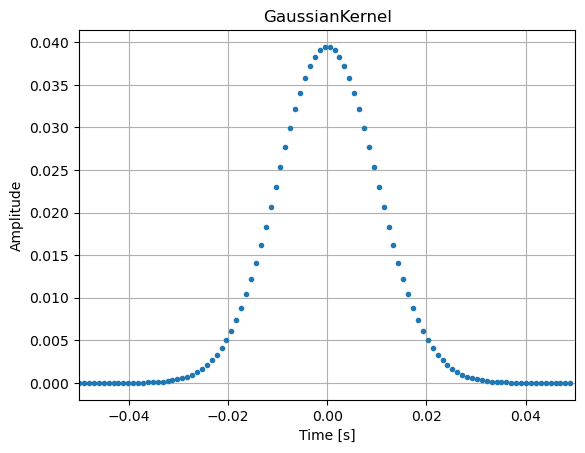

In [17]:
#use a Gaussian Kernal for cross-correlation
tg = np.linspace(-0.05, 0.05, 101, endpoint=False) 
sigma=0.01
GaussianKernel = np.exp(-tg**2/(2*sigma**2))
GaussianKernel/=GaussianKernel.sum()
#plot the kernel
fig, ax = plt.subplots()
ax.plot(tg, GaussianKernel, '.')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.grid(True)
ax.set_title('GaussianKernel')
ax.set_xlim([-0.05, 0.05])

In [18]:
GaussianKernel

array([1.47200038e-07, 2.40312579e-07, 3.88497041e-07, 6.21930069e-07,
       9.85911704e-07, 1.54766556e-06, 2.40579624e-06, 3.70325139e-06,
       5.64482101e-06, 8.52039610e-06, 1.27353834e-05, 1.88498062e-05,
       2.76276778e-05, 4.00981657e-05, 5.76298191e-05, 8.20186537e-05,
       1.15590101e-04, 1.61313710e-04, 2.22927961e-04, 3.05070657e-04,
       4.13408078e-04, 5.54753572e-04, 7.37163605e-04, 9.69996778e-04,
       1.26391924e-03, 1.63083863e-03, 2.08374840e-03, 2.63646615e-03,
       3.30325231e-03, 4.09830168e-03, 5.03510728e-03, 6.12570617e-03,
       7.37982771e-03, 8.80397727e-03, 1.04005003e-02, 1.21666826e-02,
       1.40939508e-02, 1.61672426e-02, 1.83646132e-02, 2.06571425e-02,
       2.30091902e-02, 2.53790318e-02, 2.77198832e-02, 2.99812937e-02,
       3.21108624e-02, 3.40562010e-02, 3.57670448e-02, 3.71973966e-02,
       3.83075749e-02, 3.90660411e-02, 3.94508872e-02, 3.94508872e-02,
       3.90660411e-02, 3.83075749e-02, 3.71973966e-02, 3.57670448e-02,
      

In [19]:
GaussianKernel.shape

(101,)

In [20]:
x_smoothed = correlate(x_noisy, GaussianKernel, mode='nearest')

In [21]:
x_smoothed.shape

(1000,)

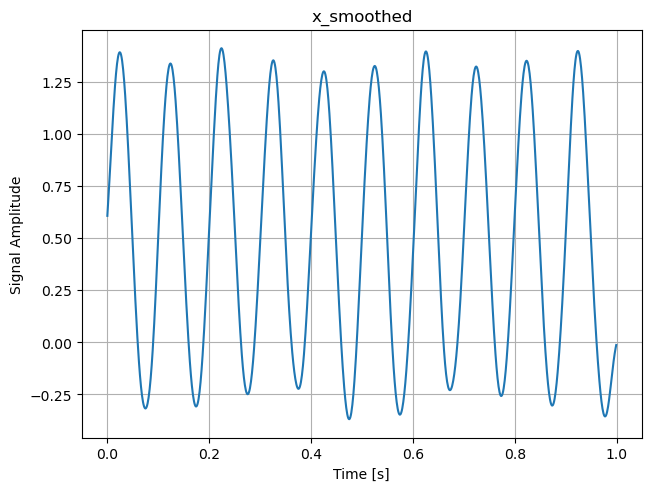

In [22]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(t, x_smoothed, '-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('x_smoothed')
ax.grid(True)

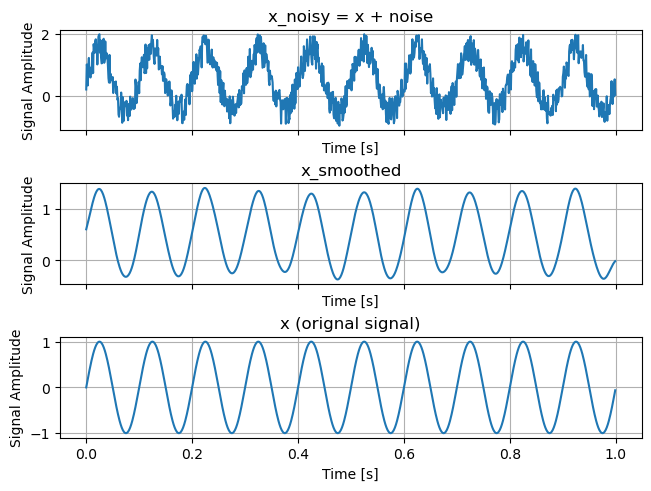

In [23]:
fig, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x_noisy, '-')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Signal Amplitude')
ax[0].set_title('x_noisy = x + noise')
ax[0].grid(True)
ax[1].plot(t, x_smoothed, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Signal Amplitude')
ax[1].set_title('x_smoothed')
ax[1].grid(True)
ax[2].plot(t, x, '-')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Signal Amplitude')
ax[2].set_title('x (orignal signal)')
ax[2].grid(True)

#### apply peak detection to the smoothed signal

In [24]:
peak_idx_smoothed=peak_detector(x_smoothed)

In [25]:
peak_idx_smoothed.shape

(10,)

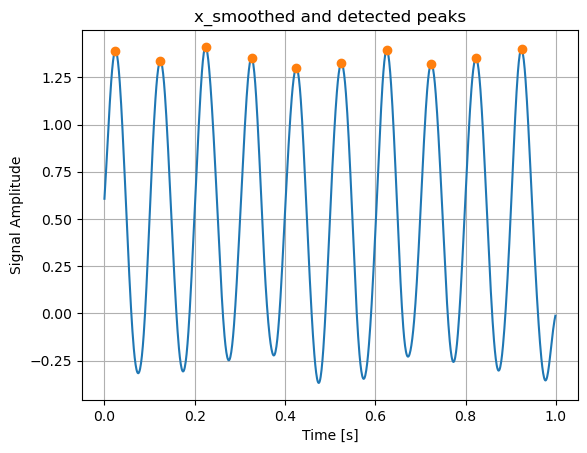

In [26]:
fig, ax = plt.subplots()
ax.plot(t, x_smoothed, '-')
ax.plot(t[peak_idx_smoothed], x_smoothed[peak_idx_smoothed], 'o')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('x_smoothed and detected peaks')
ax.grid(True)

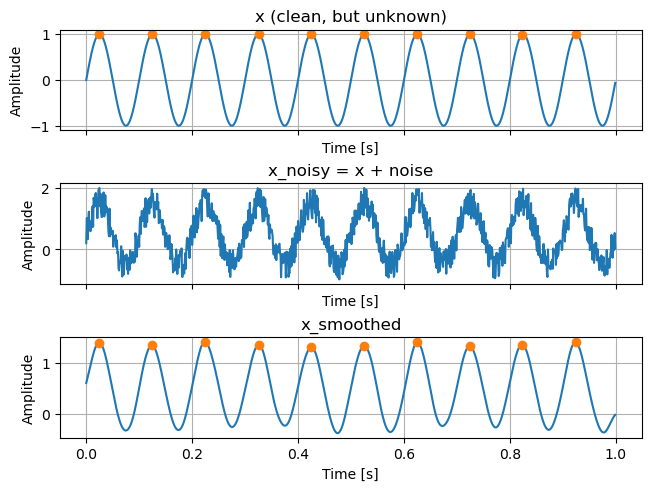

In [27]:
fig, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
ax[0].plot(t, x, '-')
ax[0].plot(t[peak_idx_smoothed], x[peak_idx_smoothed], 'o')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('x (clean, but unknown)')
ax[0].grid(True)
ax[1].plot(t, x_noisy, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('x_noisy = x + noise')
ax[1].grid(True)
ax[2].plot(t, x_smoothed, '-')
ax[2].plot(t[peak_idx_smoothed], x_smoothed[peak_idx_smoothed], 'o')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('x_smoothed')
ax[2].grid(True)

# In the ECG project, the data/signal in the file already has noise, and you do not need to add noise to the signal.